1. Load các thư viện cần thiết

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

2. Load dữ liệu MNIST

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle = True, random_state=42)
print(f"Shape of X_train: {X_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of X_train: (48000, 28, 28)


3. Data Preprocessing

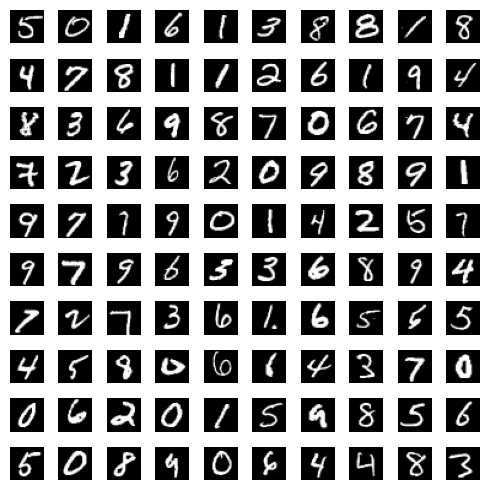

In [ ]:
num_images, num_rows, num_cols = 100, 10, 10
images = X_train[:num_images].reshape(num_images, 28, 28)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5))
for row in range(num_rows):
    for col in range(num_cols):
        idx = row * num_cols + col
        axes[row, col].imshow(images[idx], cmap = 'gray')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
print(f"Shape of X_train after reshaping: {X_train.shape}")

Shape of X_train after reshaping: (48000, 28, 28, 1)


In [ ]:
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
print(f"Original data of y_train: {y_train[0]}")
print(f"Data Y_train after one-hot encoding: {Y_train[0]}")

Original data of y_train: 5
Data Y_train after one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


4. Xây dựng model và train model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
H = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8974 - loss: 1.0923 - val_accuracy: 0.9792 - val_loss: 0.0818
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9808 - loss: 0.0720 - val_accuracy: 0.9803 - val_loss: 0.0964
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9866 - loss: 0.0550 - val_accuracy: 0.9832 - val_loss: 0.0855
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9901 - loss: 0.0479 - val_accuracy: 0.9824 - val_loss: 0.0972
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9922 - loss: 0.0385 - val_accuracy: 0.9832 - val_loss: 0.1267
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9934 - loss: 0.0349 - val_accuracy: 0.9849 - val_loss: 0.1230
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9953 - loss: 0.0287 - val_accuracy: 0.9856 - val_loss: 0.1372
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9965 - loss: 0.0260 - val_accur

5. Vẽ đồ thị loss, accuracy của traning set và validation set

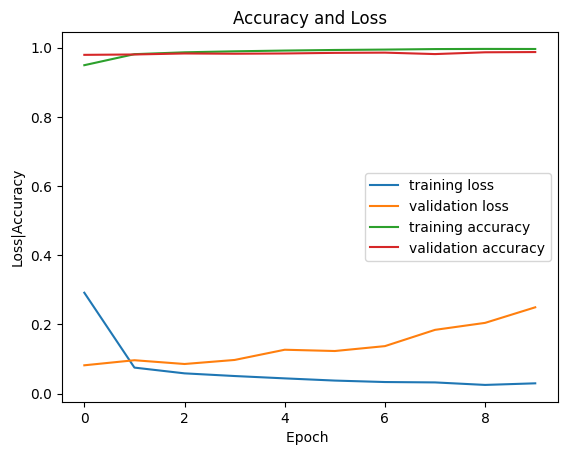

In [ ]:
numOfEpochs = 10
fig = plt.figure()
plt.plot(np.arange(0, numOfEpochs), H.history['loss'], label = 'training loss')
plt.plot(np.arange(0, numOfEpochs), H.history['val_loss'], label = 'validation loss')
plt.plot(np.arange(0, numOfEpochs), H.history['accuracy'], label = 'training accuracy')
plt.plot(np.arange(0, numOfEpochs), H.history['val_accuracy'], label = 'validation accuracy')

plt.title("Accuracy and Loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss|Accuracy")
plt.legend()

6. Đánh giá model với dự đoán test set

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)

print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9822 - loss: 0.2569
Loss: 0.21072033047676086
Accuracy: 98.66%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
Predicted value:  3


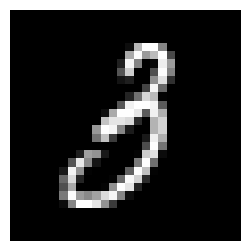

In [ ]:
rand_idx = np.random.randint(0, X_test.shape[0])

plt.figure(figsize=(3, 3))
plt.axis('off')
plt.imshow(X_test[rand_idx].reshape(28, 28), cmap = 'gray')
y_predict = model.predict(X_test[rand_idx].reshape(1, 28, 28, 1))
print('Predicted value: ', np.argmax(y_predict))